In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'


# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


In [33]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('mean_pub.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Group the DataFrame by 'Generated_Texts' and 'Model'
grouped = df.groupby(['Generated_Texts', 'Model','publications'])

# Calculate the mean for each metric within each group
mean_metrics = grouped[['Bleu', 'F1_Score', 'RougeL', 'Length', 'Vec2']].mean().reset_index()

# Save the results to a single CSV file with columns for each metric
mean_metrics.to_csv('mean_metrics_results.csv', index=False)

# Print the result
print(mean_metrics)


    Generated_Texts  Model  publications     Bleu  F1_Score    RougeL  \
0             Text1    ada            14  0.01300  0.065934  0.197802   
1             Text1    ada            45  0.03140  0.126126  0.214286   
2             Text1    ada            59  0.01240  0.068182  0.186047   
3             Text1    ada            61  0.00510  0.014815  0.162963   
4             Text1    ada            62  0.06700  0.130435  0.244444   
..              ...    ...           ...      ...       ...       ...   
163           Text3  turbo           100  0.15915  0.348385  0.498698   
164           Text3  turbo           150  0.15615  0.235439  0.371212   
165           Text3  turbo           250  0.30110  0.392157  0.600000   
166           Text3  turbo           300  0.15510  0.408163  0.583333   
167           Text3  turbo           400  0.25850  0.489796  0.666667   

         Length      Vec2  
0    224.000000  0.707634  
1    417.000000  0.833058  
2    331.000000  0.717981  
3    397.00

In [ ]:
import pandas as pd

# Your original data
data = pd.read_csv('bleu2_results.csv')

# Pivot the data to the desired format
pivoted_data = data.pivot(index='Model', columns='Generated_Texts', values='Bleu')

# If you want to rename the columns as specified
pivoted_data.columns = ['Text1', 'Text2', 'Text3']

# Reset the index
pivoted_data.reset_index(inplace=True)

# Save the pivoted data to a CSV file
pivoted_data.to_csv('bleu.csv', index=False)

print("Data has been saved to 'pivoted_data.csv'")


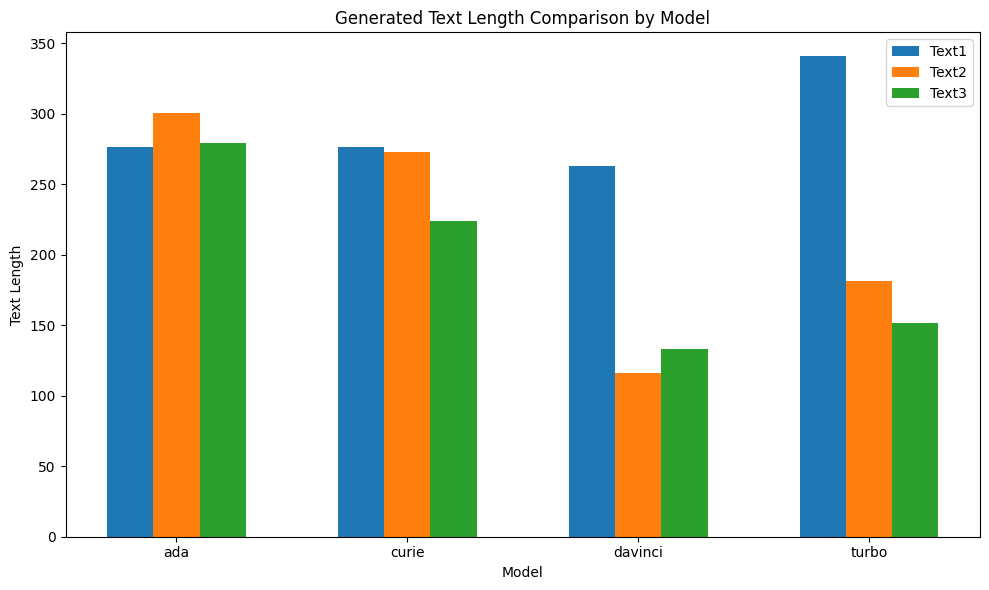

In [17]:
#1-	Comparison of Prompts by Model and Text Length Metric

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Text1': [276.65, 276.65, 262.95, 340.80],
    'Text2': [300.40, 272.90, 116.50, 181.45],
    'Text3': [279.20, 224.25, 133.50, 151.55]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated Text Length Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


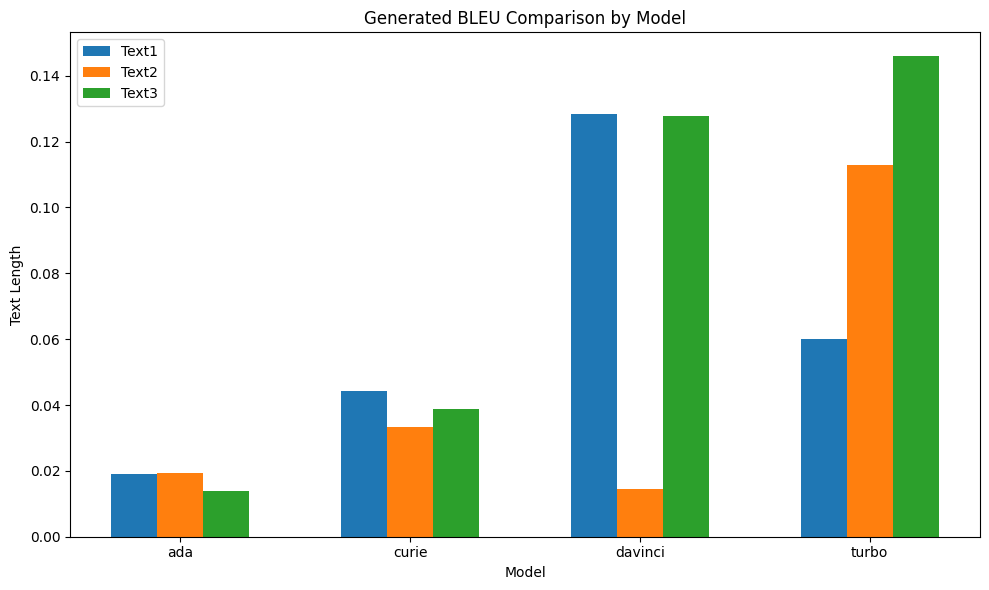

In [14]:
#1-	Comparison of Prompts by Model and Text Length Metric

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = pd.read_csv('pivoted_data.csv')

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated BLEU Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


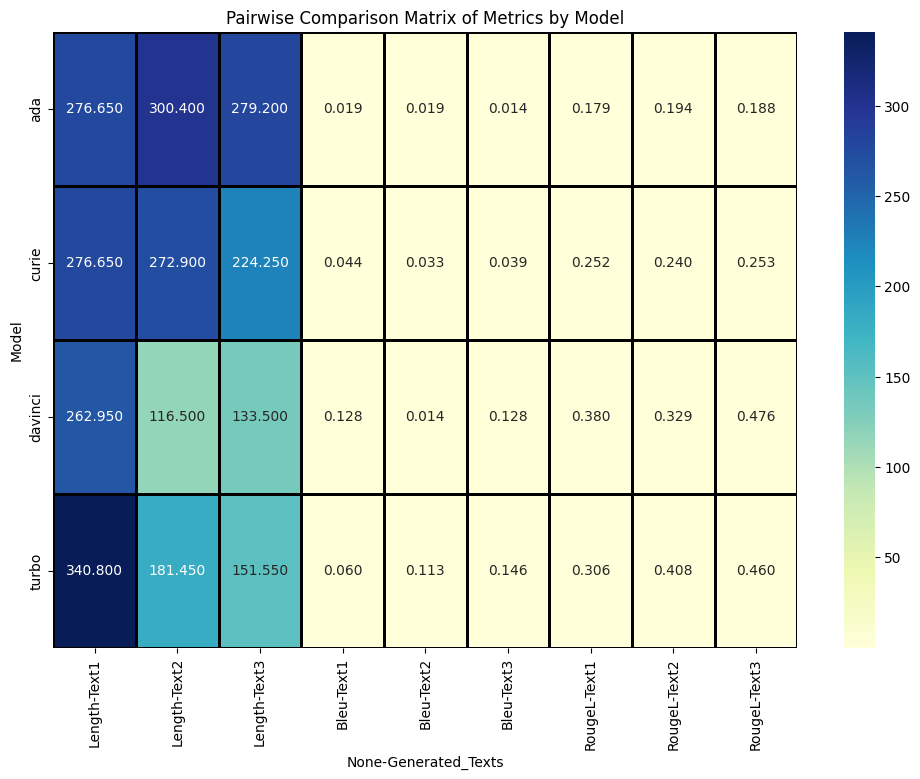

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataset
data = pd.read_csv('mean.csv')


# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame to create the Pairwise Comparison Matrix
pivot_df = df.pivot(index="Model", columns="Generated_Texts", values=["Length", "Bleu", "RougeL"])

# Create the matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=1, linecolor="black")
plt.title("Pairwise Comparison Matrix of Metrics by Model")
plt.show()


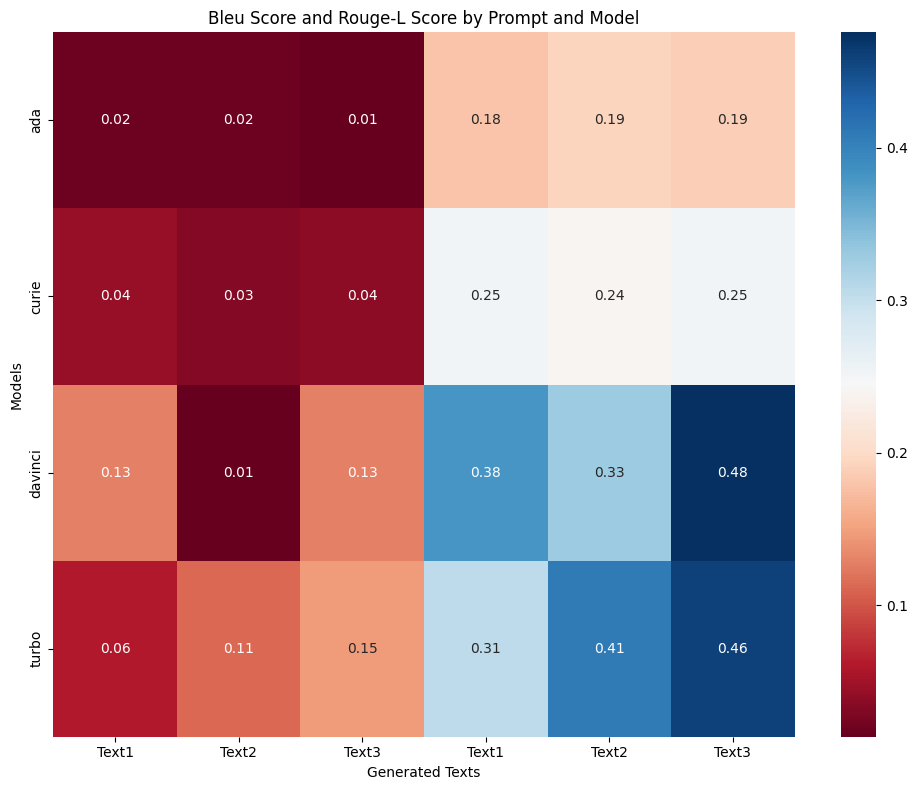

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('mean.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Model', columns='Generated_Texts', values=['Bleu', 'RougeL'])

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', xticklabels=heatmap_data.columns.get_level_values(1), yticklabels=heatmap_data.index)
plt.xlabel('Generated Texts')  # Updated x-axis label
plt.ylabel('Models')
plt.title('Bleu Score and Rouge-L Score by Prompt and Model')
plt.tight_layout()

# Show the plot
plt.show()
